
# Investigate a Dataset (TMDb Movie Dataset)

## Table of Contents
<ul>
<li><a style="color:black" href="#intro">Introduction</a></li>
<li><a style="color:black" href="#wrangling">Data Wrangling</a></li>
<li><a style="color:black" href="#eda">Exploratory Data Analysis</a></li>
<li><a style="color:black" href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>#### The TMDb dataset contains most of the necessary information about a movie like rating, revenue, cast etc.
>> This data helps us to analyze the movies for trends and answer some interesting questions

In [571]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [581]:
# Loading the data from csv file
tmdb_data = pd.read_csv('data/tmdb-movies.csv')
# check to see how data frame looks like
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100000,2015,137999939.280026,348161292.489031
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300000,2015,101199955.472019,271619025.407628
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500000,2015,183999919.040035,1902723129.801820
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300000,2015,174799923.088033,1385748801.470520


#### Info about the data
<ul>
<li>Using head() we were able to see what and observe what exactly are we dealing with here</li>

<li>Now that we can see that there are 21 columns which are already names to access them and the indexex are 0,1,2.</li>
But we can use imdb_id to uniquely identify movies.
</ul>
Lets check for any null or missing values in the datase


In [582]:
tmdb_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Removing or droping null imdb_id row)

>From the above code cell we can see some missing data.
>>As the missing information is already padded as NaN and Null numberical values as 0, There is not much of a work is to be done here.<br>

We can see that there are 10 imdb_id's that are null, and we don't need those 10 rows with no imdb_id's.

In [583]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

tmdb_data.dropna(axis=0, subset=['imdb_id'], inplace=True)
tmdb_data.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7922
director                  40
tagline                 2817
keywords                1487
overview                   3
runtime                    0
genres                    21
production_companies    1025
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning (Removing unwanted columns)

In [584]:
tmdb_data = tmdb_data.drop(['keywords','production_companies','tagline', 'homepage', 'overview'], axis=1)
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10856 entries, 0 to 10865
Data columns (total 16 columns):
id                10856 non-null int64
imdb_id           10856 non-null object
popularity        10856 non-null float64
budget            10856 non-null int64
revenue           10856 non-null int64
original_title    10856 non-null object
cast              10780 non-null object
director          10816 non-null object
runtime           10856 non-null int64
genres            10835 non-null object
release_date      10856 non-null object
vote_count        10856 non-null int64
vote_average      10856 non-null float64
release_year      10856 non-null int64
budget_adj        10856 non-null float64
revenue_adj       10856 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB



### Data Cleaning (Editing columns)

In [585]:
from datetime import datetime as d
def time_change(data):
    return d.strftime(d.strptime(data, "%m/%d/%y"), "%B")
tmdb_data["release_month"] = tmdb_data["release_date"].apply(time_change)

<a id='eda'></a>
## Exploratory Data Analysis
<br>
### Research Question 1 
>### During years, how are runtime, popularity and average are trending?

In [586]:
years_data = tmdb_data.groupby("release_year").mean()

>Now we have movies grouped by their respective release_year, now we can answer the question

>#### Runtime over the years

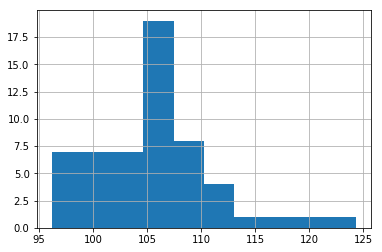

In [587]:
years_data['runtime'].hist()

# Popularity vs revenue over the years using scatter plot
# gen = tmdb_data.groupby("release_year").mean()



In [588]:
years_data['runtime'].describe()

count    56.000000
mean    105.714425
std       5.508770
min      96.179331
25%     101.910776
50%     105.678699
75%     107.593247
max     124.343750
Name: runtime, dtype: float64

>#### Observation
>>It can be observed that the runtime over the years is not much changed and mostly lied between 102 and 108 minutes.

>#### Popularity over the years

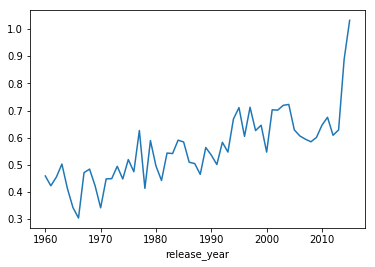

In [589]:
years_data['popularity'].plot()

In [590]:
years_data['popularity'].describe()

count   56.000000
mean     0.559691
std      0.128433
min      0.304112
25%      0.469625
50%      0.546928
75%      0.626934
max      1.032126
Name: popularity, dtype: float64

>#### Observations
>>It can be observed that the popularity for movies has been increasing gradually and there was a sudden rise in popularity for movies after 2010. <b>Rise of social media and promotions through it explains the rise.</b>

>### Revenue over the years

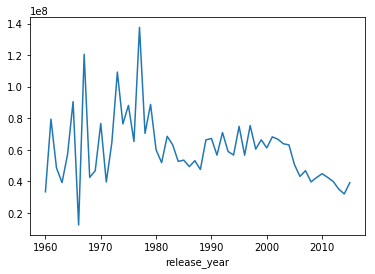

In [591]:
years_data['revenue_adj'].plot()

In [592]:
pd.set_option('float_format', '{:f}'.format)
years_data['revenue_adj'].describe()

count          56.000000
mean     60320905.665552
std      21608549.269838
min      12375267.862580
25%      46311153.931230
50%      58028439.516300
75%      68326552.934284
max     137636153.147237
Name: revenue_adj, dtype: float64

>#### Observations
>The observations that can be inferred are the revenue from movies acquired over the years is mostly concentrated between<br> <b>4.5 billion to 7 billion dollars</b>

In [593]:
revenue = pd.concat([pd.Series(x) for x in tmdb_data['revenue']]).astype('float')
print(revenue.mean())
# revenue.apply(std_data)


39860003.02827929


In [594]:
gen = tmdb_data.groupby("release_year").mean()

gen['vote_average'].describe()
# lg = pd.concat([tmdb_data['genres'], tmdb_data["genres"].str.split('|', expand=True)], axis=1)


count   56.000000
mean     6.104334
std      0.200442
min      5.795392
25%      5.958838
50%      6.041295
75%      6.242106
max      6.703636
Name: vote_average, dtype: float64

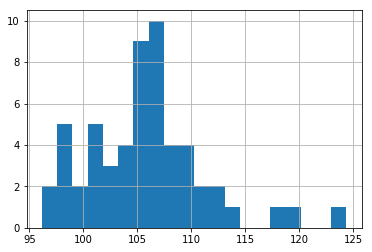

In [595]:
gen['runtime'].hist(bins=20)

### Research Question 2 

>### 

In [596]:
gen.head()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,
1960,15715.281250,0.458932,689279.625000,4531406.250000,110.656250,77.531250,6.325000,5082036.244033,33409910.816586
1961,18657.000000,0.422827,1488290.322581,10894199.612903,119.419355,77.580645,6.374194,10856871.340392,79471674.148057
1962,17001.062500,0.454783,1710066.437500,6736870.187500,124.343750,74.750000,6.343750,12326926.494005,48562384.349448
1963,16556.000000,0.502706,2156808.823529,5511911.441176,111.323529,82.823529,6.329412,15356865.693690,39245798.141323
1964,17379.571429,0.412428,940075.261905,8118613.857143,109.214286,74.690476,6.211905,6608980.476981,57076026.416531


AxesSubplot(0.125,0.125;0.775x0.755)


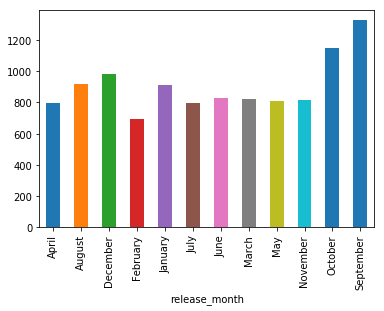

In [445]:
month_analysis =  tmdb_data.groupby("release_month")
a = month_analysis.describe()['budget']['count'].plot.bar()
print(a)

In [604]:
years_data

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,
1960,15715.281250,0.458932,689279.625000,4531406.250000,110.656250,77.531250,6.325000,5082036.244033,33409910.816586
1961,18657.000000,0.422827,1488290.322581,10894199.612903,119.419355,77.580645,6.374194,10856871.340392,79471674.148057
1962,17001.062500,0.454783,1710066.437500,6736870.187500,124.343750,74.750000,6.343750,12326926.494005,48562384.349448
1963,16556.000000,0.502706,2156808.823529,5511911.441176,111.323529,82.823529,6.329412,15356865.693690,39245798.141323
1964,17379.571429,0.412428,940075.261905,8118613.857143,109.214286,74.690476,6.211905,6608980.476981,57076026.416531
1965,17564.714286,0.342587,2005860.428571,13088052.971429,118.171429,52.000000,6.194286,13881684.856709,90576704.215997
1966,16514.000000,0.304112,1251191.304348,1842101.934783,106.891304,31.739130,6.128261,8405521.565484,12375267.862580
1967,17429.700000,0.471154,2516305.000000,18445865.925000,104.950000,77.550000,6.242500,16448491.282245,120576267.527514
1968,18628.589744,0.484202,1844589.743590,6788025.128205,107.282051,108.128205,6.379487,11563665.987047,42553882.545984


In [664]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

def std(data):
    return (data - data.mean())/data.std()
def minmax(data):
    return (data - data['popularity'].min())/(data['popularity'].max()-data['popularity'].min())
a = tmdb_data.popularity.apply(minmax)
normalized_data = years_data.apply(minmax)
popularity = normalized_data['popularity']
no_votes = normalized_data['vote_count']
plt.scatter(tmdb_data['popularity'], tmdb_data['revenue_adj'], alpha = 0.2)
# gen = gen.apply(std)
# plt.scatter(gen["revenue_adj"], pop['popularity'])
# plt.scatter(pop["popularity"], pop['vote_average'])
# plt.plot(pop["popularity"])
# plt.plot(pop["vote_average"])
# gen.head()
# a = ["budget_adj", "revenue_adj"]
# a = [plt.scatter(gen[x]) for x in a]
# a = gen.describe()
# a['budget']['count'].plot()

TypeError: 'float' object is not subscriptable

Observation here is that even the vote count

In [655]:
tmdb_data.popularity.mean()

0.64682781816507

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!